## Importing Dependencies

In [1]:
import time    #for calculating time
import math    #for using floor in creating minibatches
import pickle #for saving model


#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from  dataset import load_dataset, dev_test_split, prep_dataset
from dataset import visualize_data_distribution, visualize_dataset, label_description

# from finalModelUtils import relu, relu_grad, softmax

np.random.seed(1)
%matplotlib inline

## Dataset Preparation

### Loading Dataset

In [2]:
dataset_size_in_per = 25

train_x_orig, train_y_orig, test_x_orig, test_y_orig = load_dataset(dataset = "mnist", size_in_per = dataset_size_in_per)

print("Sample Size : %d%%\n"%(dataset_size_in_per))
print("Data\t\t\t","Datatype\t\t","Dataset Size")
print("=================================================================")
print("Training Set Images:\t" + str(type(train_x_orig))+"\t",str(train_x_orig.shape))
print("Training Set Labels:\t" + str(type(train_y_orig))+"\t",str(train_y_orig.shape))
print("Test Set Images:\t" + str(type(test_x_orig))+"\t",str(test_x_orig.shape))
print("Test Set Labels:\t" + str(type(test_y_orig))+"\t",str(test_y_orig.shape))
print("=================================================================")



Sample Size : 25%

Data			 Datatype		 Dataset Size
Training Set Images:	<class 'numpy.ndarray'>	 (15000, 28, 28)
Training Set Labels:	<class 'numpy.ndarray'>	 (15000, 1)
Test Set Images:	<class 'numpy.ndarray'>	 (2500, 28, 28)
Test Set Labels:	<class 'numpy.ndarray'>	 (2500, 1)


### Dev-Test set Split

In [3]:
dev_x_split, dev_y_split, test_x_split, test_y_split = dev_test_split(test_x_orig, test_y_orig)

print("Data\t\t\t","Datatype\t\t","Shape")
print("=================================================================")
print("Dev Set Images:\t\t" + str(type(dev_x_split))+"\t",str(dev_x_split.shape))
print("Dev Set Labels:\t\t" + str(type(dev_y_split))+"\t",str(dev_y_split.shape))
print("Test Set Images:\t" + str(type(test_x_split))+"\t",str(test_x_split.shape))
print("Test Set Labels:\t" + str(type(test_y_split))+"\t",str(test_y_split.shape))
print("=================================================================")


Data			 Datatype		 Shape
Dev Set Images:		<class 'numpy.ndarray'>	 (1250, 28, 28)
Dev Set Labels:		<class 'numpy.ndarray'>	 (1250, 1)
Test Set Images:	<class 'numpy.ndarray'>	 (1250, 28, 28)
Test Set Labels:	<class 'numpy.ndarray'>	 (1250, 1)


### Visualizing Data Distribution

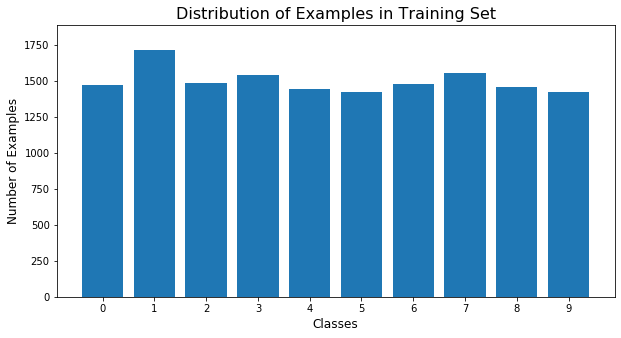

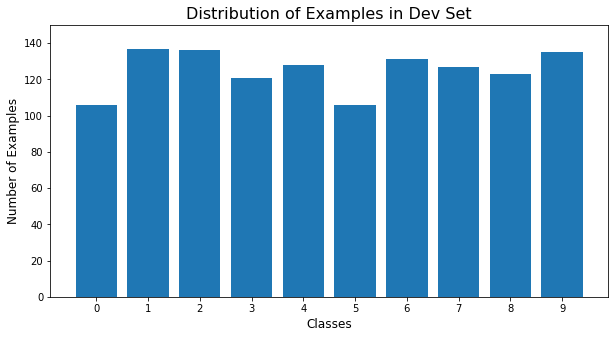

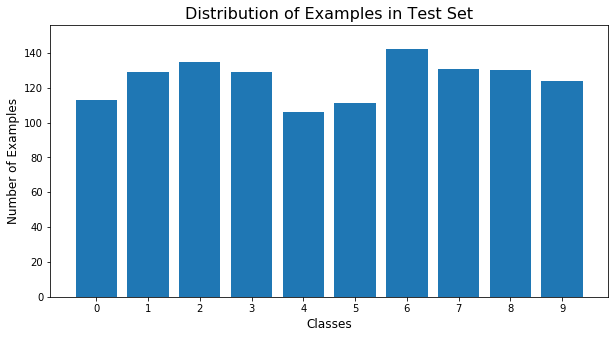

In [4]:
visualize_data_distribution(train_y_orig, dataset_type = "training")
visualize_data_distribution(dev_y_split,  dataset_type = "dev")
visualize_data_distribution(test_y_split,  dataset_type = "test")

### Visualizing Dataset

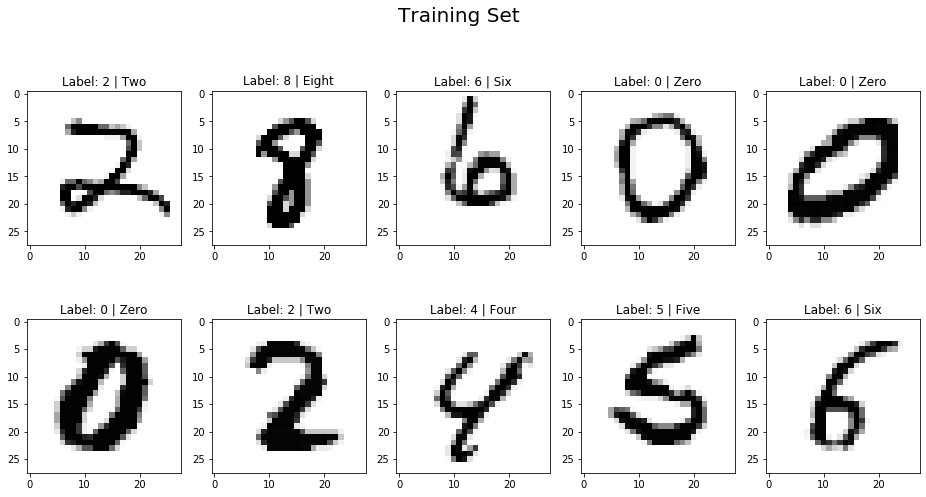

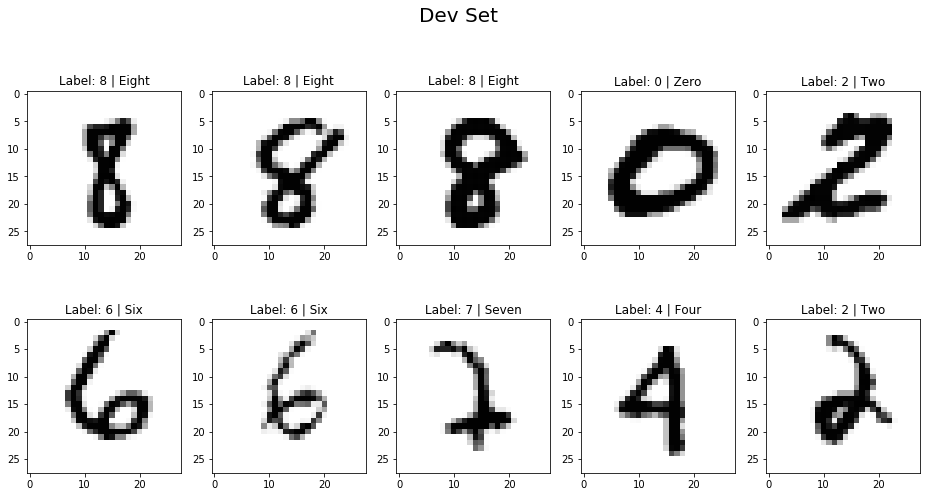

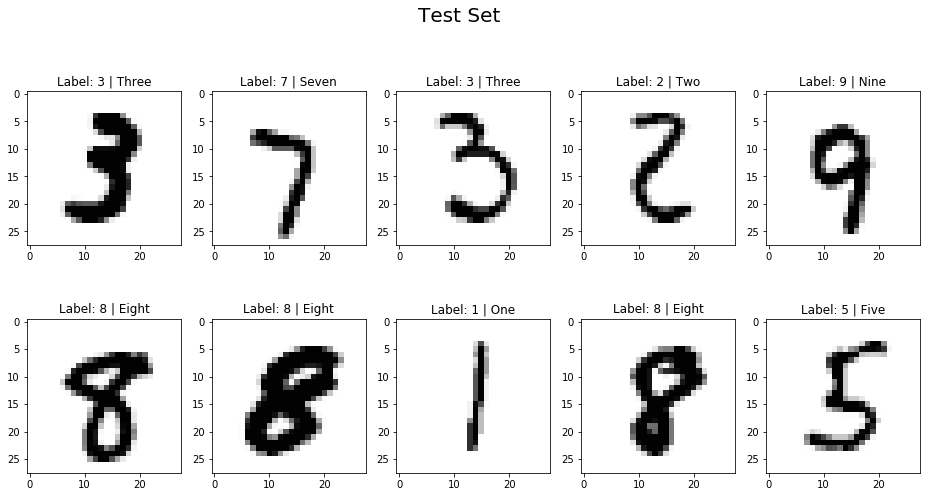

In [5]:
visualize_dataset(train_x_orig, train_y_orig, dataset = "mnist", dataset_type = "training")
visualize_dataset(dev_x_split, dev_y_split, dataset = "mnist", dataset_type = "dev")
visualize_dataset(test_x_split, test_y_split, dataset = "mnist", dataset_type="test")

### Preparing Dataset

In [6]:
train_x_norm, train_y_encoded = prep_dataset(train_x_orig, train_y_orig, num_class = 10)
dev_x_norm, dev_y_encoded= prep_dataset(dev_x_split, dev_y_split, num_class = 10)
test_x_norm, test_y_encoded = prep_dataset(test_x_split, test_y_split, num_class = 10)

print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_orig.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_orig.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_split.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_split.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_split.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_split.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(15000, 28, 28)		(784, 15000)
Training Set Labels:	(15000, 1)		(10, 15000)
Dev Set Images:		(1250, 28, 28)		(784, 1250)
Dev Set Labels:		(1250, 1)		(10, 1250)
Test Set Images:	(1250, 28, 28)		(784, 1250)
Test Set Labels:	(1250, 1)		(10, 1250)


## Model Utils

### ReLU Activation

In [7]:
#relu function
def relu(Z):
    """Compute the ReLU activation of Z.
        
        Arguments:
            Z (numpy.ndarray): Input Sum to a hidden unit, Z = W * X + b.
        
        Returns:
            tuple: Following values
            - **A** (numpy.ndarray): Activation obtained by applying ReLU function to the sum. Size same as that of Z.
            - **cache** (numpy.ndarray): Value stored for use during backward propagation.
        
        Example:
            >>> np.random.seed(1)
            >>> Z = np.random.randn(1,6)
            >>> **A,cache = relu(Z)**
            >>> print(A)
            
            Output: 
                [[1.62434536 0.     0.      0.      0.86540763 0.    ]]
    """

    A = np.maximum(0.0,Z)
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache


In [8]:
#relu gradient function
def relu_grad(dA, cache):
    """Compute the backward ReLU activation of dA.
        
        Arguments:
            dA (numpy.ndarray): Gradient of activation of the previous layer.
            cache (numpy.ndarray): Value of Z stored during forward prop.
            
        Returns:
            numpy.ndarray: - **dZ**: array of gradient/derivative of the dA, Same size of dA.
            
        Example:
            >>> np.random.seed(1)
            >>> dA = np.random.randn(1,6)
            >>> cache = np.random.randn(1,6)
            >>> **dZ = relu_grad(dA,cache)**
            >>> print(dZ)
            
            Output:
                [[ 1.62434536  0.         -0.52817175  0.          0.86540763  0.        ]]
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    dZ[Z <= 0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ


### Softmax Activation

In [9]:
def softmax(Z):
    """Compute the softmax activtion of Z.
        
        Argument:
            Z (numpy.ndarray): Input Sum to a hidden unit, Z = W * X + b.
        
        Returns:
            tuple: Following Values
            - **A** (numpy.ndarray): Activation obtained by applying softmax function to the sum. Size same as that of Z.
            - **cache** (numpy.ndarray): Value stored for use during backward propagation.
            
        Example:
            >>> np.random.seed(2)
            >>> Z= np.random.rand(7,1)
            >>> **A,cache = softmax(Z)**
            >>> print(A)
            
            Output:
                [[0.15477477]
                 [0.10270926]
                 [0.17340649]
                 [0.15467071]
                 [0.15237489]
                 [0.13925557]
                 [0.12280831]]
    """
    shift = Z - np.max(Z) #Avoiding underflow or overflow errors due to floating point instability in softmax
    t = np.exp(shift)
    A = np.divide(t,np.sum(t,axis = 0))
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache



In [10]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [11]:
def sigmoid_grad(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ


### Creating Minibatches

In [12]:
def rand_mini_batches(X, Y, minibatch_size = 64, seed=1):
    """Returns the minibatches of X and corresponding Y of the given size.
    
        Arguments:
            X (numpy.ndarray): Inputs Array.
            Y (numpy.ndarray): Output Labels.
            minibatch_size (int): Size of each minibatch.
            seed (int): Seed value for randomness.
        
        Returns:
            list: - **minibatches**: List of minibatches where each minibatch contains a minibatch of X and a minibatch of its corresponding Y.
            
        Examples:
            >>> X = np.random.randn(20,20)
            >>> Y = np.random.rand(1,20)
            >>> **minibatches = rand_mini_batches(X,Y,minibatch_size = 4, seed = 2)**
            >>> print(minibatches[0][0].shape)
            >>> print(minibatches[0][1].shape)
            
            Outputs:
                (20, 4)
                (1, 4)
    """
   
    classes = Y.shape[0]
    np.random.seed(seed)            
    m = X.shape[1]                  # number of training examples
    minibatches = []
        
#     Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((classes,m))

#     Partition (shuffled_X, shuffled_Y) except for the last batch
    num_complete_minibatches = math.floor(m/minibatch_size) # number of mini batches of size mini_batch_size 
    for k in range(0, num_complete_minibatches):
        minibatch_X = shuffled_X[:, k * minibatch_size : (k+1)*minibatch_size]
        minibatch_Y = shuffled_Y[:, k * minibatch_size : (k+1)*minibatch_size]
        minibatch = (minibatch_X, minibatch_Y)
        minibatches.append(minibatch)
    
    # Last batch (last mini-batch < mini_batch_size)
    if m % minibatch_size != 0:
        minibatch_X = shuffled_X[:, num_complete_minibatches * minibatch_size : m]
        minibatch_Y = shuffled_Y[:, num_complete_minibatches * minibatch_size : m]
        minibatch = (minibatch_X, minibatch_Y)
        minibatches.append(minibatch)
    
    return minibatches

### Time Conversion

In [13]:
#time Conversion
def convert_time(millisec):
    """Converts time in miliseconf to higher values.
    
        Arguments:
            milisec (int): Time in mili-seconds.
        
        Returns: 
            tuple: Following values
            - **hours** (int):  Time in hours.
            - **mins** (int): Time in minutes.
            - **secs** (int):  Time in seconds.
            - **milisec** (int): Time in mili-seconds.
            
        Example:
            >>> **hr,mins,sec,milisec = convert_time(millisec = 12450)**
            >>> print("%dhr %dmins %ds %dms"%(hr,mins,sec,milisec))
            
            Outputs:
                0hr 0mins 12s 450ms
    """
    
    hours = millisec // 3.6e+6
    mins = (millisec % 3.6e+6) // 60000
    secs = ((millisec % 3.6e+6) % 60000) // 1000
    millisec = ((millisec % 3.6e+6) % 60000) % 1000
    
    return (hours, mins, secs, millisec)


### Evaluation Matrices

In [48]:
#creating Confusion Matrix
def confusion_matrix(y_orig,prediction):
    """Returns a confusion matrix for a given output labels and prediction.
    
        Arguments:
            y_orig (numpy.ndarray): Original Output Labels of shape(m,1); m = # of examples.
            prediction (numpy.ndarray): Predicted Labels of the dataset of shape (1,m).
        
        Returns:
            numpy.ndarray:- **cm**: 2D confusion matrix.
            
        Example:
            >>> y = np.array([[1,2,3,3,0,2,5,4,2,2]]).reshape(10,1)
            >>> pred = np.array([[2,2,1,3,0,2,5,4,2,2]]).reshape(1,10)
            >>> prediction = {"First Prediction":pred}
            >>> **cm_train = confusion_matrix(y,prediction)**
            >>> print(cm_train)
            
            Output:
                [[1 0 0 0 0 0]
                 [0 0 1 0 0 0]
                 [0 0 4 0 0 0]
                 [0 1 0 1 0 0]
                 [0 0 0 0 1 0]
                 [0 0 0 0 0 1]]
    """
    first_predict = prediction["First Prediction"]
    
    y_predicted = first_predict[0].T
    
    m = y_orig.shape[0]
    k = len(np.unique(y_orig)) # or simply take k =10
    
    cm = np.zeros((k,k))
    
#     print(y_orig[4],y_predicted[4])
    
    for i in range(m):
        cm[y_orig[i],y_predicted[i]] += 1
   
    return cm.astype(int)


In [50]:
## Plotting Confusion Matrix

def plot_confusion_matrix(cm, dataset_type):
    """Plots the Heatmap of the confusion matrix.
    
        Arguments:
            cm (numpy.ndarray): 2D confusion matrix.
            dataset_type (str): Type of dataset. May be training or dev or test.
            
        Example:
            >>> plot_confusion_matrix(cm, dataset_type)
    """
    fig, ax = plt.subplots(figsize=(10,10))
    im = plt.imshow(cm,cmap="GnBu") #RdYlGn, PiYG, Accent,Blues,viridis, YlGnBu


    fig.colorbar(im,ax=ax,fraction=0.045)
    # ax.set_aspect('auto')
    
    if(dataset_type == "training"):
        visual_title = "Confusion Matrix for Training Set "
    elif(dataset_type == "dev"):
        visual_title = "Confusion Matrix for Dev Set "
    elif(dataset_type == "test"):
        visual_title = "Confusion Matrix for Test Set "
    else:
        raise ValueError("Dataset set must be training or dev or test set")
        
        
    #getting the label description
    label_desc = label_description(dataset = "mnist")
    desc = [label_desc[i] for i in range(0,10)]
    
    ax.set_title(visual_title,fontsize=24,pad = 20)    
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))    
    ax.set_xlabel("Predicted", fontsize = 20)
    ax.set_ylabel("Expexted", fontsize = 20)
    
    
    ax.set_xticklabels(desc)
    ax.set_yticklabels(desc)

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation = 45, ha="right",
#              rotation_mode="anchor")

    
    #setting horizontal axes labeling to top.
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

#     # Turn off all the ticks
#     ax.tick_params(top=False,left=False)

    thres = cm.max()//2

    for i in range(10):
        for j in range(10):
            per = cm[i,j]/cm.sum() * 100
            ax.text(j, i, "%d\n%.2f%%"%(cm[i, j], per),
                           ha="center", va="center", color="w" if cm[i,j] > thres else "black")


    fig.tight_layout()
    plt.show()


In [17]:
## Calculating precision, Recall and F1-Score
def precision(label, cm):
    """Returns the precision for the prediction of an individual label.
    
        Arguments:
            label (int): unique labels (each class).
            cm (numpy.ndarray): 2D confusion matrix.
        
        Returns:
            numpy.float64: - **prec**: Precision for the given label.
            
        Example:
            if cm = [[1 0 0 0 0 0]
                     [0 0 1 0 0 0]
                     [0 0 4 0 0 0]
                     [0 1 0 1 0 0]
                     [0 0 0 0 1 0]
                     [0 0 0 0 0 1]]
            >>> label = 2
            >>> prec = precision(label, cm)
            >>> print(prec)
            
            Output:
                0.8
    """
    col = cm[:, label]
    prec = cm[label, label] / col.sum()
    return prec
    
def recall(label, cm):
    """Returns the recall for the prediction of an individual label.
    
        Arguments:
            label (int): unique labels (each class).
            cm (numpy.ndarray): 2D confusion matrix.
        
        Returns:
            numpy.float64: - **rec**: Recall for the given label.
            
        Example:
            if cm = [[1 0 0 0 0 0]
                     [0 0 1 0 0 0]
                     [0 0 4 0 0 0]
                     [0 1 0 1 0 0]
                     [0 0 0 0 1 0]
                     [0 0 0 0 0 1]]
            >>> label = 2
            >>> rec = recall(label, cm)
            >>> print(rec)
            
            Output:
                1.0
    """
    row = cm[label, :]
    rec = cm[label, label] / row.sum()
    return rec

def f1_score(prec,rec):
    """Returns the f1-score for the prediction of an individual label.
    
        Arguments:
            prec (numpy.float64): precision for a label.
            rec (numpy.float64): recall for a label.
        
        Returns:
            numpy.float64: - **f1**: f1-score for the precision and recall.
            
        Example:
            >>> prec = 0.8
            >>> rec = 1.0
            >>> f1 = f1_score(prec,rec)
            >>> print(f1)
            
            Output:
                0.888888888888889
    """
    f1 = (2 * prec * rec) / (prec + rec)
    return f1


In [18]:
##Calculating macro precision, recall and f1-score
def macro_precision_average(precs):
    """Returns the macro average of the precisions for the prediction of all the label.
    
        Arguments:
            precs (list): lists of precisions of type numpy.float64.
        
        Returns:
            numpy.float64: - **prec_mac_avg**: macro average of the precisions.
            
        Example:
            >>> avg_precision = macro_precision_average(prec)
    """
    count = len(precs)    
    prec_mac_avg = np.sum(precs) / count
    return prec_mac_avg

def macro_recall_average(recs):
    """Returns the macro average of the recall for the prediction of all the label.
    
        Arguments:
            recs (list): lists of recalls of type numpy.float64.
        
        Returns:
            numpy.float64: - **rec_mac_avg**: macro average of the recalls.
            
        Example:
            >>> avg_recall = macro_recall_average(rec)
    """
    count = len(recs)
    rec_mac_avg = np.sum(recs) / count
    return rec_mac_avg

def macro_f1_score(f1s):
    """Returns the macro average of the f1-score for the prediction of all the label.
    
        Arguments:
            f1s (list): lists of f1-scores of type numpy.float64.
        
        Returns:
            numpy.float64: - **f1_mac_avg**: macro average of the f1-scores.
            
        Example:
            >>> avg_f1 = macro_f1_score(f1)
    """
    count = len(f1s)
    f1_mac_avg = np.sum(f1s) / count
    return f1_mac_avg


In [19]:
##calculating the accuracy
def accuracy(cm):
    """Returns the accuracy of the prediction.
    
        Arguments:
            cm (numpy.ndarray): 2D confusion matrix.

        Returns:
            numpy.float64: - **acc**: Accuracy of the prediction.
            
        Example:
            if cm = [[1 0 0 0 0 0]
                     [0 0 1 0 0 0]
                     [0 0 4 0 0 0]
                     [0 1 0 1 0 0]
                     [0 0 0 0 1 0]
                     [0 0 0 0 0 1]]
            >>> acc = accuracy(cm)
            
            Outputs:
                0.8
    """
    diagonal_sum = cm.trace()
    sum_of_all_elements = cm.sum()
    acc = diagonal_sum / sum_of_all_elements 
    return acc


In [20]:
## Calculating model metrices
def model_metrics(cm):
    """Returns the metrices and macro metrices for the evaluation of the model.
        Metrices includes:
            Precision, Recall and F1-score
        Macro Metrices includes:
            Macro Precision Average, Macro Recall Average and Macro F1-score Average
    
        Arguments:
            cm (numpy.ndarray): 2D confusion matrix.

        Returns: tuple: Following Values
            - **metrices** (dict): Model Metrices including list of Precision, Recall and F1-score.
            - **macro_metrices** (dict): Model Macro metrices including Macro Precision Average, Macro Recall Average and Macro F1-score Average.
            - **acc** (numpy.float64): Accuracy of the prediction.
            
        Example:
            >>> metrics, macro_metrics, acc = model_metrics(cm)
    """
    precs = []
    recs = []
    f1s = []
    metrics = {}
    macro_metrics = {}
    for label in range(10):
        precs.append(precision(label, cm))
        recs.append(recall(label, cm))
        f1s.append(f1_score(precs[label], recs[label]))
    
    avg_precision = macro_precision_average(precs)
    avg_recall = macro_recall_average(recs)
    avg_f1 = macro_f1_score(f1s)
    acc = accuracy(cm)
    
    metrics = {"Precision":precs,
               "Recall":recs,
               "F1-Score":f1s}
    macro_metrics = {"Precision":avg_precision,
                     "Recall":avg_recall,
                     "F1-Score":avg_f1}
    
    return metrics, macro_metrics, acc


In [21]:
##displaying the model summary
def metric_summary(metrics, macro_metrics, accuracy):
    """Displays the metric summary after evaluation.
    
        Arguments:
            metrices (dict): Model Metrices including list of Precision, Recall and F1-score.
            macro_metrices (dict): Model Macro metrices including Macro Precision Average, Macro Recall Average and Macro F1-score Average.
            accuracy (numpy.float64): Accuracy of the prediction.
            
        Example:
            >>> metric_summary(metrics, macro_metrics, acc)
    """
    print("+===============+===============+===============+===============+")
    print("| Label \t| Precision \t| Recall \t| F1 Score \t|")
    print("+===============+===============+===============+===============+")
    prec = metrics["Precision"]
    rec = metrics["Recall"]
    f1 = metrics["F1-Score"]
    
    for label in range(len(prec)):
        print("| %d \t\t|  %.5f \t|  %.5f \t|  %.5f \t|"%(label, prec[label], rec[label], f1[label]))

    print("+===============+===============+===============+===============+") 
    
    avg_precision = macro_metrics["Precision"]
    avg_recall = macro_metrics["Recall"]
    avg_f1 = macro_metrics["F1-Score"]
    acc = accuracy
    
    print("| Macro Avg \t|  %.5f \t|  %.5f \t|  %.5f \t|"%( avg_precision, avg_recall, avg_f1))
    print("+===============+===============+===============+===============+") 
    
    print("\n Accuracy \t\t  %.5f"%(acc))



### Visualizations

In [22]:
# Visualizing the Training Result

def visualize_training_results(train_accs, val_accs, train_loss, val_loss):
    """Visualize the traininig accuracy and loss, validation accuracy and loss over the training time.
    
        Arguments:
            train_accs (): 
            val_accs ():
            train_loss ():
            val_loss ():
            
        Example:
            >>>
    """
    
    #creating subplots
    fig, axes = plt.subplots(nrows=2, ncols = 1,figsize=(10,15))
    fig.subplots_adjust(wspace=.2, hspace = .5)
    
    axes[0].plot(np.squeeze(train_loss), label = 'Training Loss', color = 'blue')
    axes[0].plot(np.squeeze(val_loss), label = 'Validation Loss', color = 'red')
    axes[0].legend(loc='upper right')
    
    axes[0].set_title("Training and Validation Loss " , fontsize = 16, pad = 10)
    axes[0].set_xlabel("No. of Epochs", fontsize = 12)
    axes[0].set_ylabel("Loss", fontsize = 12)
    axes[0].set_ylim(bottom = 0)  
    axes[0].grid(color='grey', alpha = 0.5)
    
    axes[1].plot(np.squeeze(train_accs), label = 'Training Accuracy', color = 'blue')
    axes[1].plot(np.squeeze(val_accs), label = 'Validation Accuracy', color = 'red')
    axes[1].legend(loc='lower right')
    axes[1].set_title("Accuracy " , fontsize = 16, pad = 10)
    axes[1].set_xlabel("No. of Epochs", fontsize = 12)
    axes[1].set_ylabel("Accuracy", fontsize = 12)
    axes[1].set_ylim(top = 1)  
    axes[1].grid(color='grey', alpha = 0.5)

    plt.show()


In [23]:
#Visualizing Prediction
def visualize_prediction(x_orig, y_orig, prediction, dataset_type):
    """Displays 10 random images along with their true and predicted labels. 
        Both initial prediction and second guess are displayed.
    
        Arguments:
            x_orig (numpy.ndarray): original input data.
            y_orig (numpy.ndarray): original output labels.
            prediction (numpy.ndarray): predictions obtained after training the model.
            dataset_type (str): Type of dataset. May be training, dev  or test.
            
        Example:
            >>> visualize_prediction(x_orig, y_orig.T, prediction, dataset_type = "training")
    """
    if(dataset_type == "training"):
        visual_title = "Sample Training Data Set"
        rng = range(30,40)
    elif(dataset_type == "dev"):
        visual_title = "Sample Dev Data Set"
        rng = range(110,120)
    elif(dataset_type == "test"):
        visual_title = "Sample Test Data Set"
        rng = range(110,120)        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
        
    #getting the label description
    label_desc = label_description(dataset = "mnist")
    
    fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(16,8))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(visual_title)

    first_lbl, first_prob = prediction["First Prediction"]
    sec_lbl, sec_prob = prediction["Second Prediction"]

    for ax,i in zip(axes.flatten(),rng):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest', cmap='Greys')
        ax.set(title = "True Label: %d | %s"%(y_orig[0,i], label_desc[y_orig[0,i]] ))
        ax.set(xlabel= "Prediction: %d | With Prob: %.4f \n2nd Guess: %d | With Prob: %.4f"%(first_lbl[0,i], first_prob[0,i], sec_lbl[0,i], sec_prob[0,i]))


In [24]:
# Visualizing Mislabeled Data
def visualize_mislabelled_images(x_orig,y_orig,prediction,dataset_type):
    """Displays 10 wrongly predicted images along with their true and predicted labels. 
        Both initial prediction and second guess are displayed.
    
        Arguments:
            x_orig (numpy.ndarray): original input data.
            y_orig (numpy.ndarray): original output labels.
            prediction (numpy.ndarray): predictions obtained after training the model.
            dataset_type (str): Type of dataset. May be training, dev  or test.
            
        Example:
            >>> visualize_mislabelled_images(x_orig, y_orig.T, prediction, dataset_type = "training")
    """
    
    first_lbl, first_prob = prediction["First Prediction"]
    sec_lbl, sec_prob = prediction["Second Prediction"]
    
    true_prediction = np.equal(first_lbl,y_orig)
    mislabelled_indices = np.asarray(np.where(true_prediction == False))
    print("Total Mislabelled Images: "+str(len(mislabelled_indices[0])))
    
    if(dataset_type == "training"):
        visual_title = "Sample Mislabelled Training Images"
    elif(dataset_type == "dev"):
        visual_title = "Sample Mislabelled Dev Images"
    elif(dataset_type == "test"):
        visual_title = "Sample Mislabelled Test Images"
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    
   #getting the label description
    label_desc = label_description(dataset = "mnist")     
    
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    
    
    for ax,i in zip(axes.flatten(),mislabelled_indices[1]):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest', cmap = "Greys")
        ax.set(title = "True Label: %d | %s"%(y_orig[0,i], label_desc[y_orig[0,i]] ))
        ax.set(xlabel= "Prediction: %d | With Prob: %.4f \n2nd Guess: %d | With Prob: %.4f"%(first_lbl[0,i], first_prob[0,i], sec_lbl[0,i], sec_prob[0,i]))


### Saving and Loading Model

In [25]:
#saving Model
def save_model(file_name, parameters):
    """Saves the parameters of the trained model into a pickle file.
    
        Arguments:
            file_name (str): name of the file to be saved.
            parameters (numpy.ndarray): trained parameters
            
        Example:
            >>>
    """
    with open(file_name ,'wb') as output_file:
        pickle.dump(parameters,output_file)


In [26]:
#Loading Model
def load_model(file_name):
    """Load the saved model from a pickle file
    
        Arguments:
            file_name (str): name of the file to be loaded from
        
        Returns:
            parameters ():
            
        Example:
            >>>
    """
    try: 
        with open(file_name ,'rb') as input_file:
            parameters = pickle.load(input_file)
        
        return parameters
    
    except(OSError, IOError) as e:
        print(e)


## Model Implementation

### Initializing the Model

#### Initializing Layers

In [27]:
def init_layers(X,Y,hidden_layers):
    """
        
        Arguments:
            
            
        Returns:
            
            
        Example:
            Here, shape of x = (784,m)
                  shape of y = (10,m)
            >>> layers_dim = init_layers(x, y, hidden_layers = [32,16])
            >>> print(layers_dim)
            
            Outputs:
                [784, 32, 16, 10]
    """
    input_nodes = X.shape[0]
    output_nodes = Y.shape[0]
    
    layers_dim = [input_nodes]
    
    for i in hidden_layers:
        layers_dim.append(i)
    
    layers_dim.append(output_nodes)
    
    return layers_dim

#### Initializing Parameters

In [28]:
def init_parameters(layers_dim, initialization = "random"):
    """
        
        Arguments:
            
            
        Returns:
            
            
        Example:
            Here, layers_dim = [784, 32, 16, 10]
            >>> parameters = init_parameters(layers_dim, initialization = "random")
            >>> print("Layer\tWeight\t\tBias")
            >>> print("================================")
            >>> for l in range(1,len(layers_dim)):
            ...     print(str(l) +"\t" + str(parameters['W'+str(l)].shape) +"\t"+ str(parameters['b'+str(l)].shape))

            
            Outputs:
                Layer    Weight         Bias
                ================================
                1        (32, 784)      (32, 1)
                2        (16, 32)       (16, 1)
                3        (10, 16)       (10, 1)
    """
    L = len(layers_dim)
    params = {}
        
    for l in range(1,L):
        #initializing Weights
        if initialization == "he":
            # he-initialization
            params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) * np.sqrt(np.divide(2,layers_dim[l-1])) 
        elif initialization == "random":
            # random initialization scaled by 0.01
            params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) * 0.01 
        else:
             raise ValueError("Initialization must be 'random' or 'he'")
        
        #initializing biases
        params['b' + str(l)] = np.zeros((layers_dim[l],1))
     
        assert(params['W' + str(l)].shape == (layers_dim[l],layers_dim[l-1])), "Dimention of W mismatched in init_params function"
        assert(params['b' + str(l)].shape == (layers_dim[l],1)), "Dimention of b mismatched in init_params function"
   
    return params

#### Initializing Hyper Parameters

In [29]:
def init_hyperParams(alpha, num_epoch, minibatch_size, lambd = 0, keep_probs = []):
    """
        
        Arguments:
            
            
        Returns:
            
            
        Example:
            >>> hyperParams = init_hyperParams(alpha = 0.0001, num_epoch = 10, minibatch_size = 1024,lambd = 0.7,keep_probs = [0.8,0.8])
    """
    hyperParams = {'learning_rate':alpha,
                   'num_epoch':num_epoch,
                   'mini_batch_size':minibatch_size,
                   'lambda':lambd,
                   'keep_probs':keep_probs,
                   'beta1':0.9,
                   'beta2':0.999,
                   'epsilon':1e-8
                  }
    
    return hyperParams

### Forward Propagation

#### Forward Sum for individual Layer

In [30]:
def forward_sum(A_prev,W,b):
    
    m = A_prev.shape[1]
    
    Z = np.dot(W,A_prev) + b
    
    cache = (A_prev,W,b)
    
    assert (Z.shape == (W.shape[0], m)), "Dimention of Z mismatched in forward_prop function"
    
    return Z, cache

#### Forward Activation for individual Layer

In [31]:
def forward_activation(A_prev,W,b,activation):
    
    if activation == 'relu':
        Z, sum_cache = forward_sum(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    elif activation == 'softmax':
        Z, sum_cache = forward_sum(A_prev,W,b)
        A, activation_cache = softmax(Z)
    
    elif activation == "tanh":
#         Z, sum_cache = forward_sum(A_prev,W,b)
#         A, activation_cache = tanh(Z)
        pass
    
    cache = (sum_cache,activation_cache)
    
    assert(A.shape == Z.shape), "Dimention of A mismatched in forward_activation function"
    
    return A, cache

#### Dropout for individual Layer

In [32]:
def forward_dropout(A,keep_probs):
     #implementing dropout
    D = np.random.rand(A.shape[0],A.shape[1])
    D = (D < keep_probs).astype(int)
    A = np.multiply(A,D)
    A = np.divide(A,keep_probs)
    
    dropout_mask = D
    
    assert (dropout_mask.shape == A.shape), "Dimention of dropout_mask mismatched in forward_dropout function"
    return A,dropout_mask

#### Forward Prop for L Layers

In [33]:
def forward_prop(X, parameters, keep_probs = [], regularizer = None):
    caches = []
    A = X
    L = len(parameters) // 2
    
    dropout_masks = []

    # len(keep_probs) == L-1: no dropouts in the Output layer, no dropout at all for prediction
    if regularizer == "dropout":
        assert(len(keep_probs) == L-1 ) 
    
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_activation(A_prev,parameters['W' + str(l)],parameters['b' + str(l)], activation='relu')
        caches.append(cache)
        if regularizer == "dropout":
            A , dropout_mask = forward_dropout(A,keep_probs[l-1])
            dropout_masks.append(dropout_mask)
        else:
            pass

    AL, cache = forward_activation(A, parameters['W' + str(L)], parameters['b' + str(L)], activation='softmax')
    caches.append(cache)
    
#     assert(AL.shape == (10,X.shape[1])), "Dimention of AL mismatched in forward_prop function"
    
    return AL,caches,dropout_masks
    

### Compute Cost

In [34]:
def softmax_cross_entropy_cost(AL, Y, caches, lambd = 0, regularizer = None):
    L = len(caches)
    m = Y.shape[1]
    
    cost = -(1./m) * np.sum(np.sum(np.multiply(Y,np.log(AL)), axis = 0,keepdims=True))
#     cost = -np.mean(Y * np.log(AL.T + 1e-8)) # add very small number 1e-8 to avoid log(0) 
    if regularizer == "l2":
        norm = 0
        for l in range(L):
            current_cache = caches[l]
            sum_cache, _ = current_cache
            _,W,_ = sum_cache
            norm += np.sum(np.square(W))

        L2_cost = (lambd/(2*m)) * norm 
        cost = cost + L2_cost
    else:
        pass
    
    cost = np.squeeze(cost)      # Making sure your cost's shape is not returned as ndarray
    
    assert(cost.shape == ()),"Dimention of cost mismatched in softmax_cross_entropy_cost function"
    
    return cost

### Backward Propagation

#### Calculating Gradients for individual Layer

In [35]:
def backward_grad(dZ, cache, lambd, regularizer):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    if regularizer == "l2":
        dW = (1/m) * np.dot(dZ,A_prev.T) + np.multiply(np.divide(lambd,m),W )
    else:
        dW = (1/m) * np.dot(dZ,A_prev.T)

    db = (1/m) * np.sum(dZ, axis = 1, keepdims=True )
    dA_prev = np.dot(W.T, dZ)

    
    assert (dW.shape == W.shape), "Dimention of dW mismatched in backward_grad function"
    assert (db.shape == b.shape), "Dimention of db mismatched in backward_grad function"
    assert (dA_prev.shape == A_prev.shape), "Dimention of dA_prev mismatched in backward_grad function"
    
    
    return dA_prev, dW, db

#### Calculating Backward Activation for individual layer

In [36]:
def backward_activation(dA, cache, lambd ,regularizer, activation):
    sum_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_grad(dA,activation_cache)
        dA_prev, dW, db = backward_grad(dZ, sum_cache, lambd, regularizer = regularizer)
        
    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = backward_grad(dZ, sum_cache, lambd, regularizer = regularizer)
    
    elif activation == "tanh":
        pass
#         dZ = tanh_grad(dA,activation_cache)
#         dA_prev, dW, db = backward_grad(dZ, sum_cache, lambd, regularizer = regularizer)
    
    return dA_prev, dW, db
    
    

#### Complete Backward Propagation for L layers

In [37]:
def backward_dropout(dA_prev_temp, D, keep_prob):
    dA_prev = np.multiply(dA_prev_temp,D)
    dA_prev = np.divide(dA_prev,keep_prob)
    return dA_prev

In [38]:
def backward_prop(AL, Y, caches, dropout_masks = [], keep_probs = [], lambd = 0, regularizer = None):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dA = np.subtract(AL,Y)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_activation(dA, current_cache,lambd = lambd, regularizer = regularizer, activation = 'softmax')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        
        if regularizer == "dropout":
            #implementing dropout
            D = dropout_masks[l]
            dA_prev_temp = backward_dropout(grads["dA" + str(l + 1)], D, keep_probs[l])
            dA_prev, dW_temp, db_temp = backward_activation(dA_prev_temp, current_cache, lambd = lambd, regularizer = regularizer, activation = 'relu')
        else:
            dA_prev, dW_temp, db_temp = backward_activation(grads["dA" + str(l + 1)], current_cache, lambd = lambd, regularizer = regularizer, activation = 'relu')
            
        
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### Update Parameters

In [39]:
#initialize adam

def initialize_adam(parameters) :
   
    L = len(parameters) // 2 
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    
    return v, s

In [40]:
def update_parameters(parameters, grads, learning_rate, optimizer = "bgd", beta1 = 0, beta2 = 0,  epsilon = 0, v = {}, s = {}, t = 0):
       
    L = len(parameters) // 2           
    v_corrected = {}                         
    s_corrected = {}                       
    
    for l in range(L):
        if optimizer == 'adam':
            # Moving average of the gradients.
            v["dW" + str(l+1)] = np.add(beta1 * v["dW" + str(l+1)], (1 - beta1) * grads["dW" + str(l+1)])
            v["db" + str(l+1)] = np.add(beta1 * v["db" + str(l+1)], (1 - beta1) * grads["db" + str(l+1)])

            # Compute bias-corrected first moment estimate.
            v_corrected["dW" + str(l+1)] = np.divide(v["dW" + str(l+1)], (1 - np.power(beta1,t)))
            v_corrected["db" + str(l+1)] = np.divide(v["db" + str(l+1)], (1 - np.power(beta1,t)))

            # Moving average of the squared gradients. 
            s["dW" + str(l+1)] = np.add(beta2 * s["dW" + str(l+1)], (1 - beta2) * np.square(grads["dW" + str(l+1)]))
            s["db" + str(l+1)] = np.add(beta2 * s["db" + str(l+1)], (1 - beta2) * np.square(grads["db" + str(l+1)]))

            # Compute bias-corrected second raw moment estimate. 
            s_corrected["dW" + str(l+1)] = np.divide(s["dW" + str(l+1)], (1 - np.power(beta2,t)))
            s_corrected["db" + str(l+1)] = np.divide(s["db" + str(l+1)], (1 - np.power(beta2,t)))

            # Update parameters. 
            parameters["W" + str(l+1)] = np.subtract(parameters["W" + str(l+1)],  learning_rate * np.divide(v_corrected["dW" + str(l+1)], np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon))
            parameters["b" + str(l+1)] = np.subtract(parameters["b" + str(l+1)],  learning_rate * np.divide(v_corrected["db" + str(l+1)], np.sqrt(s_corrected["db" + str(l+1)]) + epsilon))
        else:
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])
            
    return parameters, v, s

### Prediction

In [41]:
# Making Predictions
def predict(X, y, parameters, training = False):
    m = y.shape[1]
    prediction = {}
    loss = 0
    
    # no keep_probs : no dropout during prediction 
    probas, caches, _ = forward_prop(X, parameters)
    
    assert(probas.shape == y.shape)
        
    true_labels = np.argmax(y,axis=0).reshape(1,m)
    
    predicted_labels = np.argmax(probas,axis=0).reshape(1,m)
    predicted_prob = np.max(probas,axis = 0).reshape(1,m)
    
    if training == True:
        loss = softmax_cross_entropy_cost(probas, y, caches) 
    else:
        second_max = np.array(probas, copy=True)
        second_max[predicted_labels,np.arange(predicted_labels.size)] = 0 #zeroing out the first max prediction
        sec_predicted_labels = np.argmax(second_max,axis=0).reshape(1,m) #selecting the second max predicted label
        sec_predicted_prob = np.max(second_max,axis = 0).reshape(1,m) #selecting the second max prediction

        prediction["Second Prediction"] = [sec_predicted_labels, sec_predicted_prob]      

    prediction["First Prediction"] = [predicted_labels, predicted_prob]
    
    #print results
    true_prediction = np.equal(predicted_labels,true_labels)
    
    num_correct_labels = np.sum(true_prediction)
    accuracy = (num_correct_labels/m)
        
    return prediction, accuracy, loss

### Train Model

In [42]:
# Final Model Training

def train(X_train, Y_train, X_dev, Y_dev, layers_dim, hyperParams, initialization = "random", optimizer = 'bgd',regularizer = None, visualize = True, verbose = 0 ):
    # loading the hyper parameters
    learning_rate = hyperParams['learning_rate']
    num_epoch = hyperParams['num_epoch']
    b1 = hyperParams['beta1']
    b2 = hyperParams['beta2']
    ep = hyperParams['epsilon']
    lambd = hyperParams['lambda']
    keep_probs = hyperParams['keep_probs']
    
    #initializing the variables
    seed = 1
    m = Y_train.shape[1]
    costs = []      # keep track of epoch cost    
    train_accs = []  # keep track of training accuracy
    val_accs = []     # keep track of Validation accuracy
    train_losses = []  # keep track of training loss
    val_losses = []     # keep track of Validation loss
    
    #selecting the minibatch size for each optimizer
    if optimizer == 'sgd':
        mini_batch_size = 1
    elif optimizer == 'bgd':
        mini_batch_size = m
    elif optimizer == 'mgd' or optimizer == 'adam':
        mini_batch_size = hyperParams['mini_batch_size']
    else:
        raise ValueError("Optimizer value out of scope")
        
    #initializing the model parameters
    parameters = init_parameters(layers_dim, initialization)
    
    #initializing adam parameters, used only when optimizer = 'adam'
    t = 0
    v,s = initialize_adam(parameters)
    
    #Gradient Descent begins
    train_toc = time.time() # for calculating entire training time
    for i in range(0, num_epoch):
        seed += 1
        batch_cost = []
        batch_trained = 0
        batch_time = 0
        if verbose !=0:
            print("\nEpoch: %d/%d"%(i+1,num_epoch))
        
        minibatches = rand_mini_batches(X_train, Y_train, mini_batch_size, seed)
        
        
        for minibatch in minibatches:
            batch_toc = time.time() # for calculating time of an epoch cycle
            
            #retriving minibatch of X and Y from training set
            (minibatch_X, minibatch_Y) = minibatch
            
            #forward Propagation
            AL, caches, dropout_masks = forward_prop(minibatch_X, parameters, keep_probs = keep_probs, regularizer = regularizer)
            
            #Computing cross entropy cost
            cross_entropy_cost = softmax_cross_entropy_cost(AL, minibatch_Y, caches, lambd = lambd, regularizer = regularizer) #accumulating the batch costs
            batch_cost.append(cross_entropy_cost)   
            #Backward Propagation
            grads = backward_prop(AL, minibatch_Y, caches, dropout_masks = dropout_masks, keep_probs = keep_probs, lambd = lambd, regularizer = regularizer)
                
            #Updating parameters
            t += 1
            parameters, v, s = update_parameters(parameters, grads, learning_rate, optimizer = optimizer, beta1 = b1, beta2 = b2,  epsilon = ep, v = v, s = s, t = t)
        
            #computing and accumulating training and validation accuracy and loss
            _,train_acc,train_loss = predict(X_train, Y_train, parameters, training = True)
            _,val_acc, val_loss= predict(X_dev, Y_dev, parameters, training = True)  
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            
            
                
            batch_tic = time.time()  # for calculating epoch time
            batch_time += (batch_tic - batch_toc)
            
            if verbose == 0:
                pass
            elif verbose == 1:
                batch_trained += minibatch_Y.shape[1]
                batch_trained_per = (batch_trained / m) * 100
                inc = (int(batch_trained_per)//10)
                print ("%d/%d [%s>%s %.0f%%] - %.2fs | loss: %.4f | acc: %.4f | Val loss: %.4f | Val acc: %.4f "%(batch_trained, m, '=' * inc,'.'*(10-inc), batch_trained_per, batch_time, train_loss, train_acc, val_loss, val_acc),end='\r')
            elif verbose == 2:
                print (" - %.2fs | loss: %.4f | acc: %.4f | Val loss: %.4f | Val acc: %.4f "%(batch_time, train_loss, train_acc, val_loss, val_acc),end='\r')
            
            
        epoch_cost = np.mean(batch_cost)
        costs.append(epoch_cost)
    if verbose != 0:
        train_tic = time.time() # for calculating entire training time
        hrs, mins, secs , ms = convert_time((train_tic - train_toc)*1000)
        print("\n\n*************************** Total Training Time = %dhr %dmins %dsecs %.2fms ***************************"%(hrs, mins, secs, ms))

    #visualizing the result of the training
    if visualize == True:
        visualize_training_results(train_accs, val_accs, train_losses, val_losses)    
    
    return parameters


#### Running Model


Epoch: 1/2
 - 4.92s | loss: 0.5503 | acc: 0.8527 | Val loss: 0.5498 | Val acc: 0.8528 
Epoch: 2/2
 - 4.83s | loss: 0.3249 | acc: 0.9082 | Val loss: 0.3229 | Val acc: 0.9040 

*************************** Total Training Time = 0hr 0mins 9secs 833.63ms ***************************


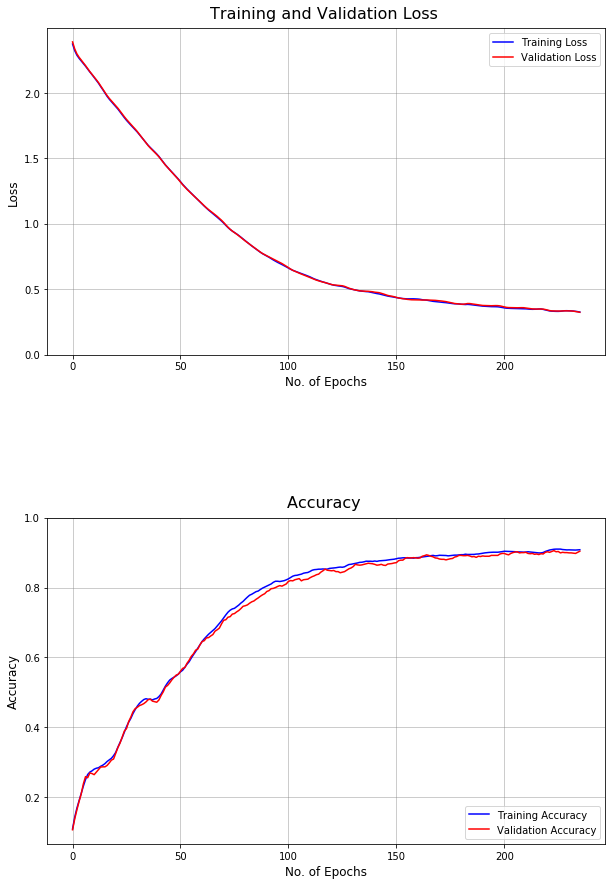

In [43]:
layers_dim = init_layers(train_x_norm, train_y_encoded, hidden_layers = [32,16])
hyperParams = init_hyperParams(alpha = 0.001, num_epoch = 2, minibatch_size = 128,lambd = 0.7,keep_probs = [0.8,.8, 1])
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam',regularizer = None, verbose = 2)

In [44]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,parameters, training = False)
print("\nAccuracy: "  + str(train_acc))
print("\nError:\t"+str(1-train_acc))


Accuracy: 0.9082

Error:	0.09179999999999999


In [45]:
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,parameters, training = False)
print("\nAccuracy: "  + str(dev_acc))
print("\nError:\t"+str(1-dev_acc))


Accuracy: 0.904

Error:	0.09599999999999997


In [46]:
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,parameters, training = False )
print("\nAccuracy: "  + str(test_acc))
print("\nError:\t"+str(1-test_acc))
print(type(prediction_test["First Prediction"][0]))


Accuracy: 0.9072

Error:	0.0928
<class 'numpy.ndarray'>


### Confusion Matrix

In [51]:
cm_train = confusion_matrix(train_y_orig, prediction_train)
print("\nConfusion Matrix for Training set:\n")
print(cm_train)

cm_dev = confusion_matrix(dev_y_split, prediction_dev)
print("\nConfusion Matrix for Dev set:\n")
print(cm_dev)

cm_test = confusion_matrix(test_y_split, prediction_test)
print("\nConfusion Matrix for Test set:\n")
print(cm_test)


Confusion Matrix for Training set:

[[1400    0   17    8    3   11   10    3   16    4]
 [   0 1668   12    3    1   12    1    1   18    2]
 [  10   10 1361   23   11    2   17   20   24    8]
 [   4    8   43 1354    1   45    4   21   49   13]
 [   3    5   10    0 1283    1   15    5   11  113]
 [   4    9   30   56   10 1179   21    2  102   10]
 [  15    8   31    3   12   17 1370    0   19    1]
 [   3    9   22    5   20    2    1 1451    9   33]
 [   7   31   25   49    7   49    8    1 1262   20]
 [   6    5    6   13   30    4    0   40   24 1295]]

Confusion Matrix for Dev set:

[[102   0   0   0   0   3   1   0   0   0]
 [  0 134   1   0   0   0   0   0   2   0]
 [  0   0 122   6   0   0   0   3   4   1]
 [  0   0   3 110   0   5   0   1   2   0]
 [  0   2   2   0 107   0   5   0   2  10]
 [  1   1   1   5   2  90   0   0   5   1]
 [  1   0   3   0   2   2 123   0   0   0]
 [  0   1   1   2   2   0   0 115   1   5]
 [  2   0   5   3   0   4   2   1 103   3]
 [  2   0   0

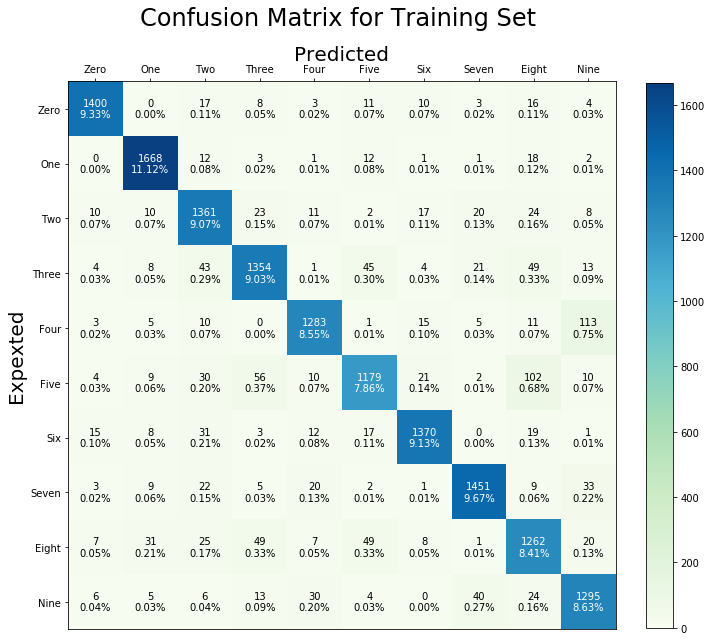

In [52]:
#plotting the confusion matrix   
plot_confusion_matrix(cm_train, dataset_type = "training")

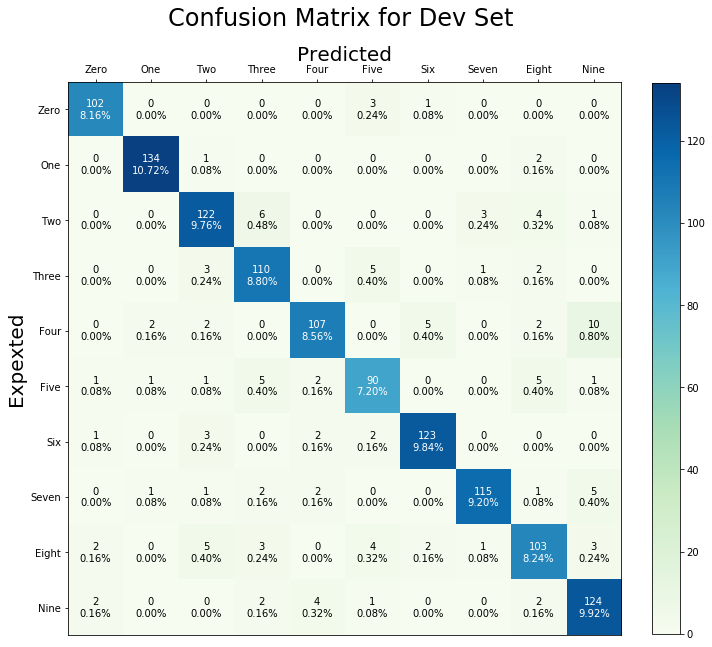

In [53]:
plot_confusion_matrix(cm_dev, dataset_type = "dev")

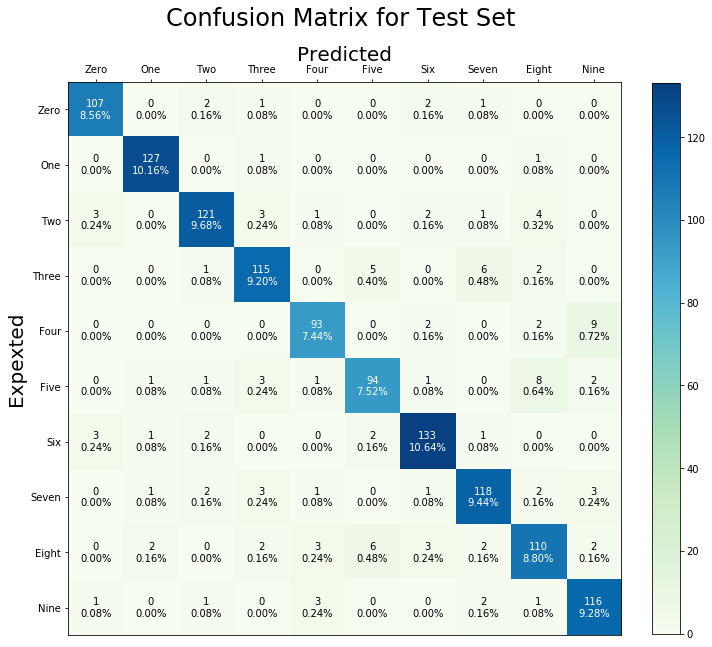

In [54]:
plot_confusion_matrix(cm_test, dataset_type = "test")

In [55]:
metrics, macro_metrics, acc = model_metrics(cm_train)
metric_summary(metrics, macro_metrics, acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.96419 	|  0.95109 	|  0.95759 	|
| 1 		|  0.95151 	|  0.97090 	|  0.96111 	|
| 2 		|  0.87412 	|  0.91588 	|  0.89451 	|
| 3 		|  0.89432 	|  0.87808 	|  0.88613 	|
| 4 		|  0.93106 	|  0.88728 	|  0.90864 	|
| 5 		|  0.89183 	|  0.82853 	|  0.85902 	|
| 6 		|  0.94679 	|  0.92818 	|  0.93739 	|
| 7 		|  0.93977 	|  0.93312 	|  0.93643 	|
| 8 		|  0.82269 	|  0.86498 	|  0.84330 	|
| 9 		|  0.86391 	|  0.91005 	|  0.88638 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.90802 	|  0.90681 	|  0.90705 	|
+===============+===============+===============+===============+

 Accuracy 		  0.90820


In [56]:
metrics, macro_metrics, acc = model_metrics(cm_dev)
metric_summary(metrics, macro_metrics, acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.94444 	|  0.96226 	|  0.95327 	|
| 1 		|  0.97101 	|  0.97810 	|  0.97455 	|
| 2 		|  0.88406 	|  0.89706 	|  0.89051 	|
| 3 		|  0.85938 	|  0.90909 	|  0.88353 	|
| 4 		|  0.91453 	|  0.83594 	|  0.87347 	|
| 5 		|  0.85714 	|  0.84906 	|  0.85308 	|
| 6 		|  0.93893 	|  0.93893 	|  0.93893 	|
| 7 		|  0.95833 	|  0.90551 	|  0.93117 	|
| 8 		|  0.85124 	|  0.83740 	|  0.84426 	|
| 9 		|  0.86111 	|  0.91852 	|  0.88889 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.90402 	|  0.90319 	|  0.90317 	|
+===============+===============+===============+===============+

 Accuracy 		  0.90400


In [57]:
metrics, macro_metrics, acc = model_metrics(cm_test)
metric_summary(metrics, macro_metrics, acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.93860 	|  0.94690 	|  0.94273 	|
| 1 		|  0.96212 	|  0.98450 	|  0.97318 	|
| 2 		|  0.93077 	|  0.89630 	|  0.91321 	|
| 3 		|  0.89844 	|  0.89147 	|  0.89494 	|
| 4 		|  0.91176 	|  0.87736 	|  0.89423 	|
| 5 		|  0.87850 	|  0.84685 	|  0.86239 	|
| 6 		|  0.92361 	|  0.93662 	|  0.93007 	|
| 7 		|  0.90076 	|  0.90076 	|  0.90076 	|
| 8 		|  0.84615 	|  0.84615 	|  0.84615 	|
| 9 		|  0.87879 	|  0.93548 	|  0.90625 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.90695 	|  0.90624 	|  0.90639 	|
+===============+===============+===============+===============+

 Accuracy 		  0.90720


#### Visualizating  Prediction

In [ ]:
visualize_prediction(train_x_orig, train_y_orig.T, prediction_train, dataset_type = "training")

In [ ]:
visualize_prediction(dev_x_split, dev_y_split.T, prediction_dev, dataset_type = "dev")

In [ ]:
visualize_prediction(test_x_split, test_y_split.T, prediction_test,dataset_type = "test")

#### Visualizing Mislabelled Images in all datasets

In [ ]:
visualize_mislabelled_images(train_x_orig, train_y_orig.T,prediction_train,dataset_type = "training")

In [ ]:
visualize_mislabelled_images(dev_x_split, dev_y_split.T, prediction_dev,dataset_type = "dev")

In [ ]:
visualize_mislabelled_images(test_x_split, test_y_split.T, prediction_test,dataset_type = "test")

### Predicting Real Time images

In [ ]:
from PIL import Image
from dataPrep import one_hot_encoding

In [ ]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

image_data =255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)

prediction,acc,_ = predict(image_norm, label_encoded, parameters)


first_lbl, first_prob = prediction["First Prediction"]
sec_lbl, sec_prob = prediction["Second Prediction"]

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("1st Prediction: %d | With Prob: %.4f \n2nd Prediction: %d | With Prob: %.4f"%(first_lbl, first_prob, sec_lbl, sec_prob))
plt.imshow(image_data, interpolation ='nearest',cmap='binary')
plt.colorbar()


## Saving and Loading model

In [ ]:
save_model(file_name = "final_model_adam_dropout", parameters = parameters)

In [ ]:
loaded_params = load_model(file_name = "final_model_adam_dropout")
print(type(loaded_params), type(parameters))

In [ ]:
L = len(loaded_params) // 2
print("Total Layers %d: "%L)

for l in range(L):
    print(loaded_params["W" + str(l+1)].shape[0])


## To Do

- [ ] Optimize the code
- [ ] Prepare the doc String
- [x] add verbose: Integer. 0, 1, or 2. Verbosity mode.
- [ ] Batch norm
- [ ] Maxout
- [ ] Data Augmentation if possible